In [1]:
!export PYTHONPATH=../../yolowell

from components.utils import read_floats, float2fixed
import pickle
import pandas as pd

In [2]:
def fixed2float(weights=[], width=16):
    float_weights = []
    for weight in weights:
        sinal = 1 if weight <= ((2**(width-1)) - 1) else -1
        magnitude = weight & 0b0111111111111111
        
        if sinal == -1:
            magnitude = bin(magnitude)[2:].zfill(width)
            magnitude = magnitude.replace("0", "-")
            magnitude = magnitude.replace("1", "0")
            magnitude = magnitude.replace("-", "1")
            magnitude = int(magnitude, 2) + 1

        if width == 16:
            integer_portion = magnitude & 0b0111100000000000
            integer_portion >>= 11
            
            fractional_portion = magnitude & 0b0000011111111111
            float_fraction_portion = 0
            
            for index, char in enumerate(bin(fractional_portion)[2:].zfill(11)):
                float_fraction_portion += 1/(2**(index+1)) if char == "1" else 0
        else:
            integer_portion = magnitude & 0b01111000
            integer_portion >>= 3
            
            fractional_portion = magnitude & 0b00000111
            float_fraction_portion = 0
            
            for index, char in enumerate(bin(fractional_portion)[2:].zfill(3)):
                float_fraction_portion += 1/(2**(index+1)) if char == "1" else 0

        float_value = int(integer_portion) + float_fraction_portion
        float_value *= sinal
        float_weights.append(float_value)
    return float_weights

In [23]:
weights = read_floats("../binary/weights.pickle")
int_fixed16_weights = float2fixed(weights, integer_portion=4, decimal_portion=11)
int_fixed8_weights = float2fixed(weights, integer_portion=4, decimal_portion=3)
float_fixed16_reconverted = fixed2float(int_fixed16_weights, width=16)
float_fixed8_reconverted = fixed2float(int_fixed8_weights, width=8)

,float32,fixed8,fixed16,ratio_fixed16,error_fixed8
count,1.036720e+06,1.036720e+06,1.036720e+06,1.036720e+06,1.036720e+06
mean,-1.012464e-03,7.004061e-04,-9.965074e-04,9.455398e-01,1.595658e-05
std,3.277842e-02,1.383205e-02,3.262305e-02,1.478501e-01,2.806294e-04
min,-7.974621e-01,-7.500000e-01,-7.973633e-01,-0.000000e+00,-4.882785e-04
25%,-1.555690e-02,0.000000e+00,-1.513672e-02,9.624900e-01,-2.256215e-04
50%,-1.620889e-03,0.000000e+00,-1.464844e-03,9.845335e-01,2.989415e-05
75%,1.206799e-02,0.000000e+00,1.171875e-02,9.938169e-01,2.576672e-04
max,6.390812e-01,6.250000e-01,6.386719e-01,1.000000e+00,4.882794e-04


In [54]:
df = pd.DataFrame({
    "float32": weights,
    "fixed8": float_fixed8_reconverted,
    "fixed16": float_fixed16_reconverted})
df.index = range(df.shape[0])
df["ratio_fixed16"] = df.fixed16 / df.float32
df["error_fixed16"] = df.fixed16 - df.float32
df["ratio_fixed8"] = df.fixed8 / df.float32
df["error_fixed8"] = df.fixed8 - df.float32

pd.set_option('float_format', '{:.6f}'.format)
df.describe()

,float32,fixed8,fixed16,ratio_fixed16,error_fixed16,ratio_fixed8,error_fixed8
count,1036720.000000,1036720.000000,1036720.000000,1036720.000000,1036720.000000,1036720.000000,1036720.000000
mean,-0.001012,0.000700,-0.000997,0.945540,0.000016,0.007452,0.001713
std,0.032778,0.013832,0.032623,0.147850,0.000281,0.078384,0.028055
min,-0.797462,-0.750000,-0.797363,-0.000000,-0.000488,-0.000000,-0.124996
25%,-0.015557,0.000000,-0.015137,0.962490,-0.000226,0.000000,-0.011956
50%,-0.001621,0.000000,-0.001465,0.984533,0.000030,0.000000,0.001612
75%,0.012068,0.000000,0.011719,0.993817,0.000258,0.000000,0.015485
max,0.639081,0.625000,0.638672,1.000000,0.000488,1.000000,0.124977


In [61]:
df.stack()

0        float32          0.142893
         fixed8           0.125000
         fixed16          0.142578
         ratio_fixed16    0.997796
         error_fixed16   -0.000315
                            ...   
1036719  fixed16         -0.035156
         ratio_fixed16    0.989587
         error_fixed16    0.000370
         ratio_fixed8    -0.000000
         error_fixed8     0.035526
Length: 7257040, dtype: float64

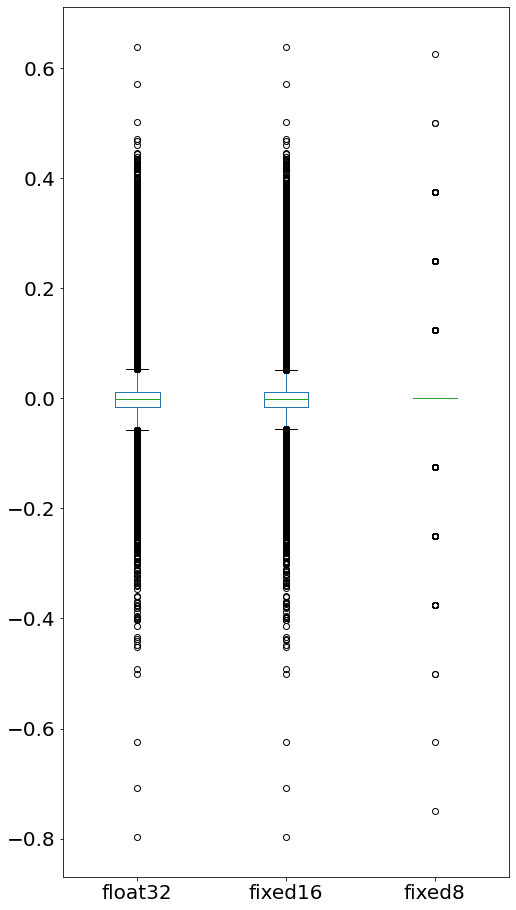

In [50]:
df[["float32", "fixed16", "fixed8"]].plot.box(fontsize=20, figsize=(8, 16), legend=True)

/home/welberthime/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/welberthime/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/welberthime/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/welberthime/.local/lib/python

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67291fb940>,
      dtype=object)

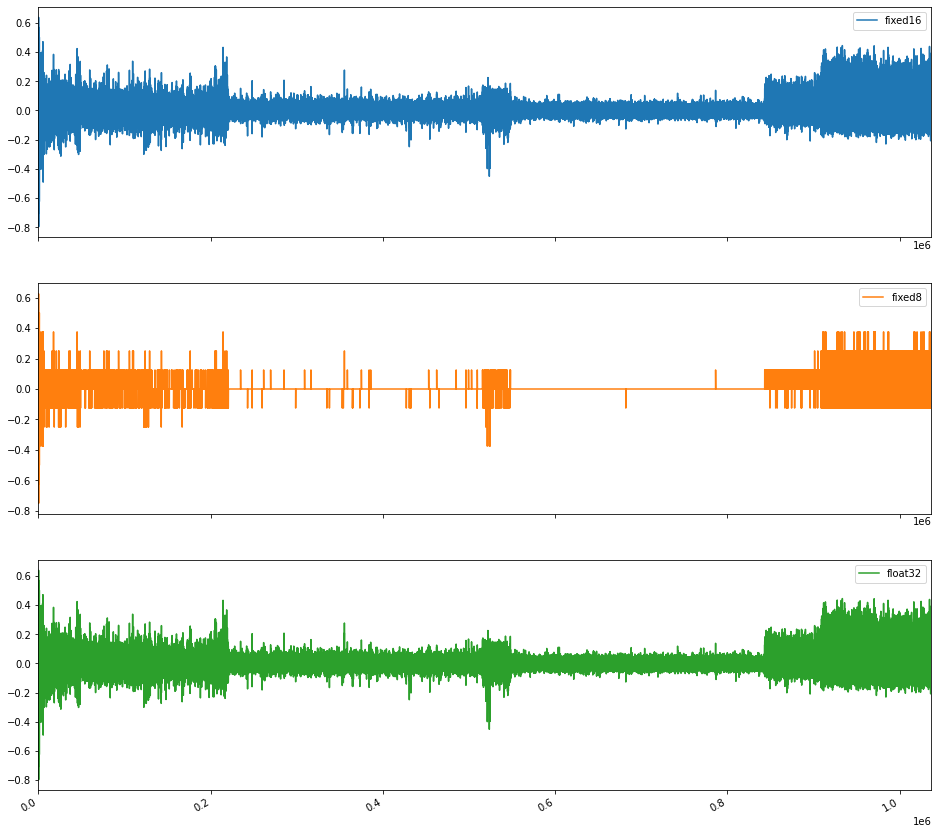

In [37]:
df[["fixed16", "fixed8", "float32"]].plot(subplots=True, figsize=(16, 16))